<a href="https://colab.research.google.com/github/muroanto191/Machine-Learning-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Load in our tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Load in our dataset
url = "/content/dataset_.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


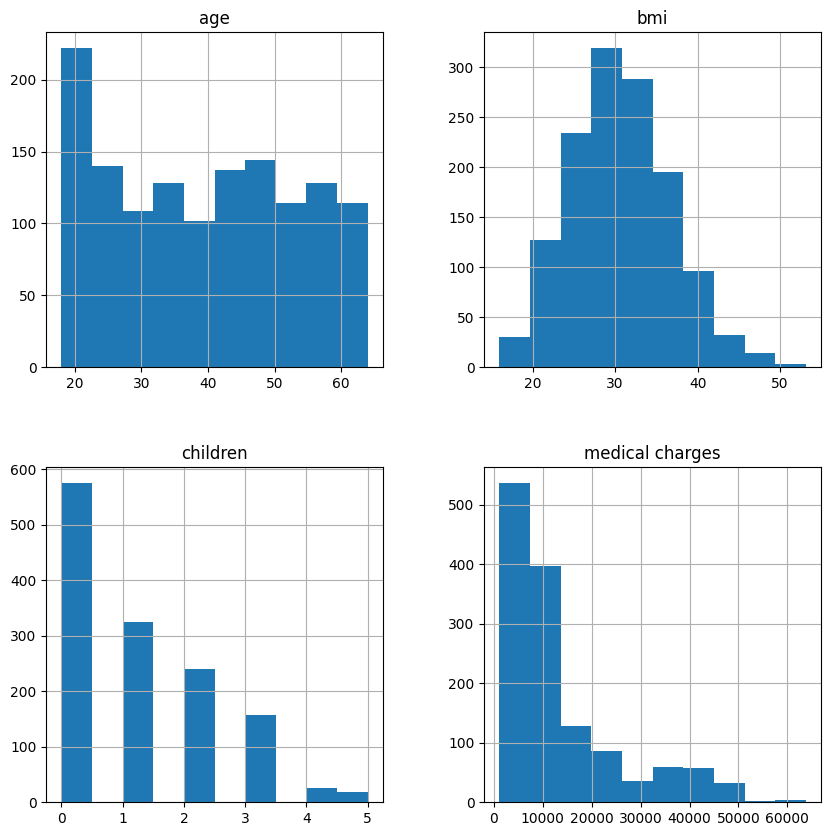

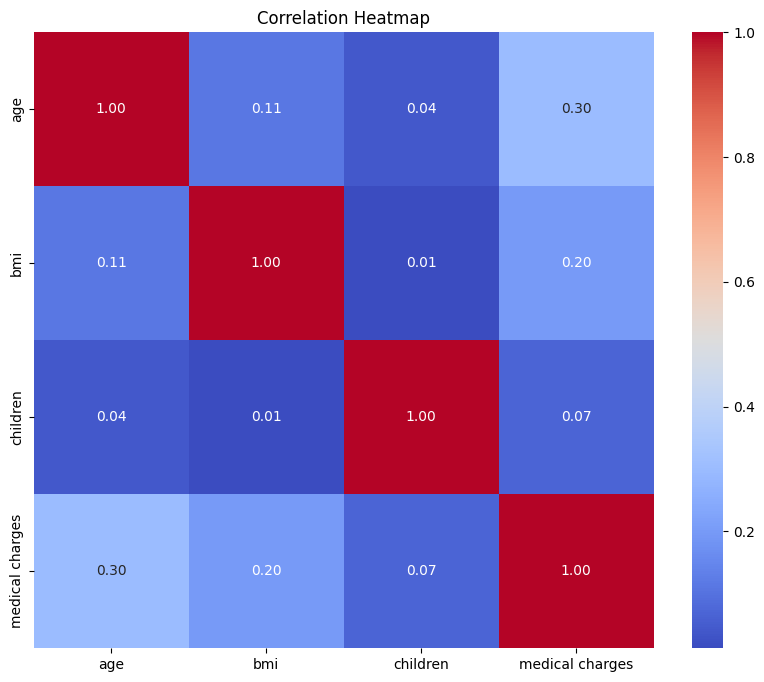

In [37]:
# Display general information
df.info()

# Get a summary of our information
df.describe()

# Check for any missing vaules we may have
df.isnull().sum()

# Plot a histogram for our numerical features
df.hist(figsize=(10, 10))
plt.show()

# Visualize correlations between the features using a heat map
# Use numerical features
numerical_df=df.select_dtypes(include=np.number)
correlations =numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [38]:
# Time to make our categorical variables into numerical
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,bmi,children,medical charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [39]:
# Standardizing numerical columns
scaler=StandardScaler()
numerical_df=df.select_dtypes(include=np.number)
df[numerical_df.columns]=scaler.fit_transform(numerical_df)
df.head()

,age,bmi,children,medical charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,-0.953689,True,False,False,True,False
2,-0.797954,0.383307,1.580926,-0.728675,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,0.719843,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,-0.776802,True,False,True,False,False


In [40]:
# Define our features such as (X) and target (Y)
x=df.drop(columns='bmi')
y=df['age']

# Split the data into a training set and a testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [41]:
# Time to start our model
model=LinearRegression()

# Time to train our model
model.fit(x_train,y_train)

# Making predictions on our test set
y_pred= model.predict(x_test)

# Model Evalution
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.3080155107583432e-30
R-squared: 1.0


In [48]:
# Time to make our Random Forest Model
rf_model=RandomForestRegressor()

#Training the model
rf_model.fit(x_train,y_train)

# Making predictions on our test set
y_pred=rf_model.predict(x_test)

# Model Evalution
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.3065860454272035e-30
R-squared: 1.0
